Herramientas computacionales: El arte de la Analítica

Grupo 1


Joshua Ricardo Acosta Ramírez A01652266

Leslie Ugalde Zamudio A01657397

Alex Álvaro Flores Contreras A01653320


INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY

Se inicializan las librerias y se inicializan las caracteristicas de loas gráficas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Cargamos nuestra base de datos (covid19_tweets.csv) utilizando pandas, además de que se pasa la columna de "user_verified" a numeros, donde 0 es falso y 1 es verdadero y esta se agrega a un lado en el mismo dataframe:

In [2]:
dataframe = pd.read_csv(r"covid19_tweets.csv")
boolVerified=[]
for i in range (0,len(dataframe["user_verified"])):
    if dataframe["user_verified"][i]==False:
        boolVerified.append(int(0))
    else:
        boolVerified.append(int(1))
dataframe.insert(8,"boolVerified",boolVerified,True)
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,boolVerified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,0,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,1,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,0,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,0,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,0,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


Obtenemos la estadística descriptiva con el comando data.describe():

In [3]:
dataframe.describe()

,user_followers,user_friends,user_favourites,boolVerified
count,7.443600e+04,74436.000000,7.443600e+04,74436.000000
mean,1.059513e+05,2154.721170,1.529747e+04,0.125665
std,8.222900e+05,9365.587474,4.668971e+04,0.331474
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.660000e+02,153.000000,2.200000e+02,0.000000
50%,9.600000e+02,552.000000,1.927000e+03,0.000000
75%,5.148000e+03,1780.250000,1.014800e+04,0.000000
max,1.389284e+07,497363.000000,2.047197e+06,1.000000


Se obtiene la cantidad de datos que tiene cada opción dentro de la columna de usuario verificado, que fue modificada a enteros en pasos anteriores: 

In [4]:
print(dataframe.groupby('boolVerified').size())

boolVerified
0    65082
1     9354
dtype: int64


In [ ]:
Se grafican las tres variables, cada una con las dos restantes, en donde además se puede observar la varible ve "user_Verified" que se presenta en todos los datos:

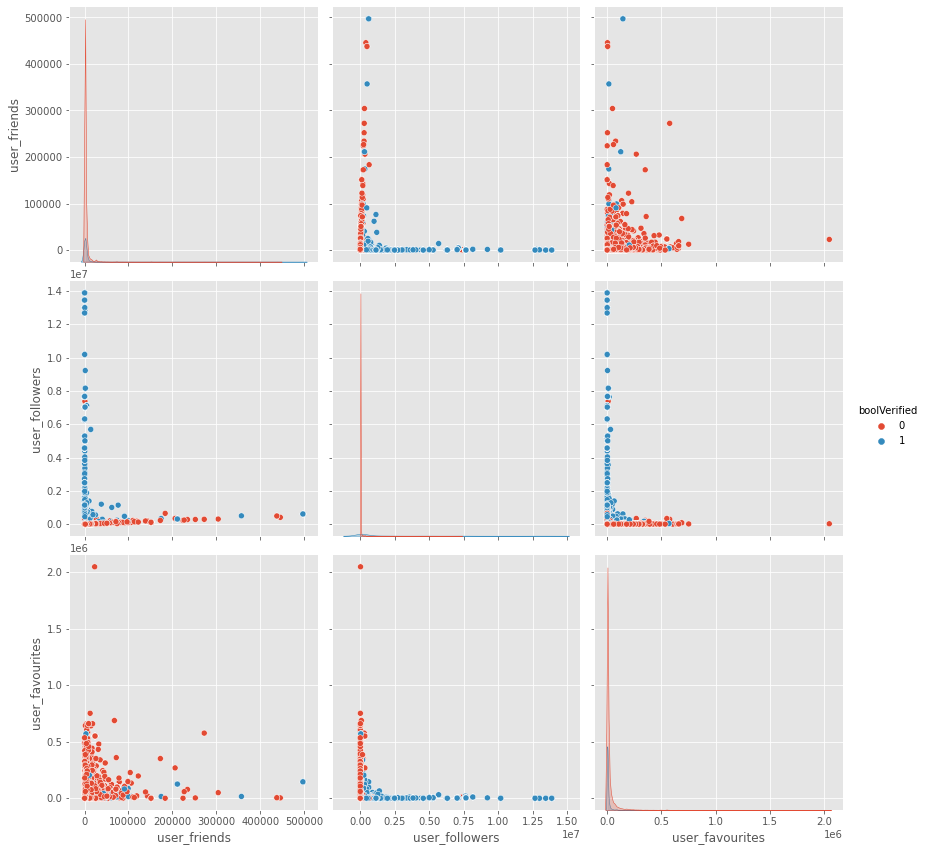

In [6]:
sb.pairplot(dataframe.dropna(), hue='boolVerified',height=4,vars=["user_friends","user_followers","user_favourites"],kind='scatter')

Figura 1. Cluster y relación de usuarios verificados entre las distintas variables. Como podemos observar los datos se dispersan entre los followers con cuentas verificadas.

In [7]:
X = np.array(dataframe[["user_friends","user_followers","user_favourites"]])
y = np.array(dataframe['boolVerified'])
X.shape

(74436, 3)

Se crea una sola grafica, en este caso tridimensional, para la representación de las tres variables.

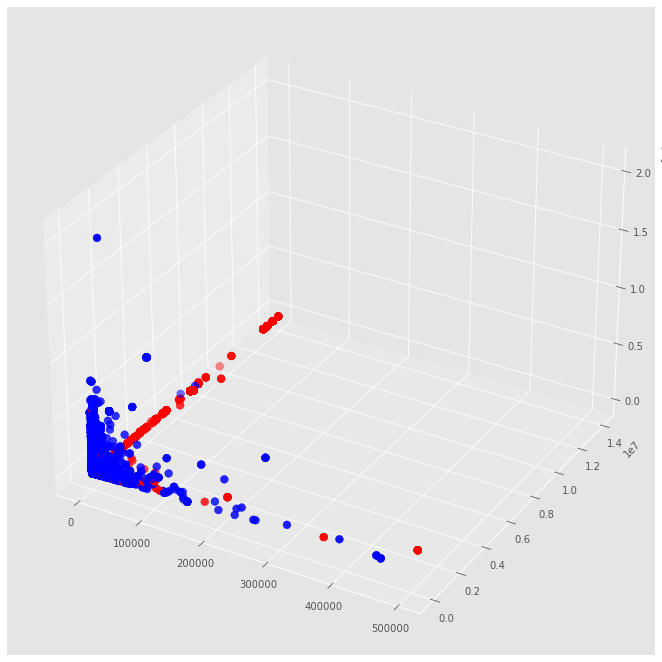

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

Figura 2. Esta gráfica representa 2 clusters el cual los puntos azules representan cuentan no verificadas y que además no presentan un buen dato de followers o amigos. Los puntos rojos son verificados, tienen más followers y pueden ser personas, comunidades o  creadores de contenido.

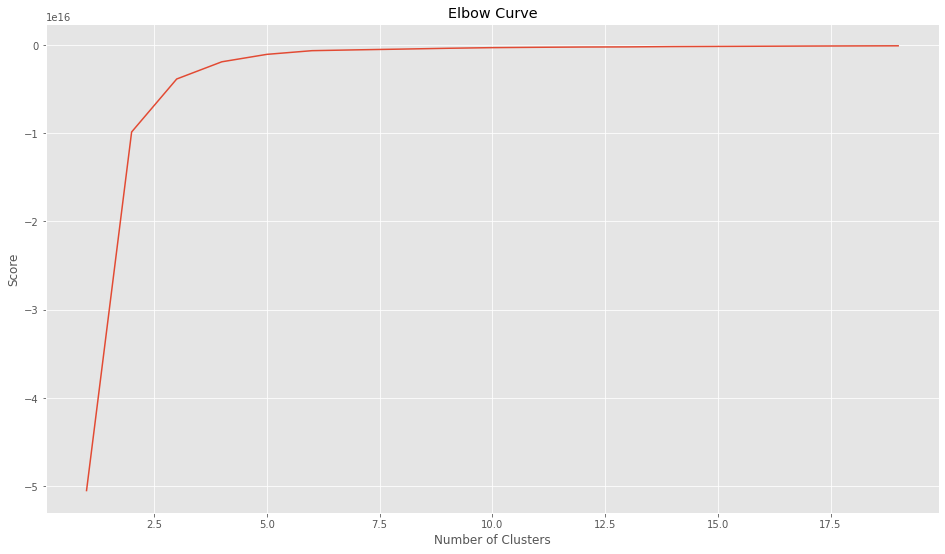

In [9]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Figura 3. Esta grafica nos muestra el resultado en la busqueda del valor de K, en este caso, muestra puntos de inflexión en 2, 3 y 4, sin embargo, para esta ocasión se decidió dejar el 3 como valor de K, ya que el cambio al aumentar el valor no tiene un cambio tan significativo.

In [10]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.17079378e+03 3.12057722e+04 1.54347130e+04]
 [2.19937888e+02 1.30086912e+07 8.03913043e+01]
 [7.12457851e+02 5.77398910e+06 2.63533719e+03]]


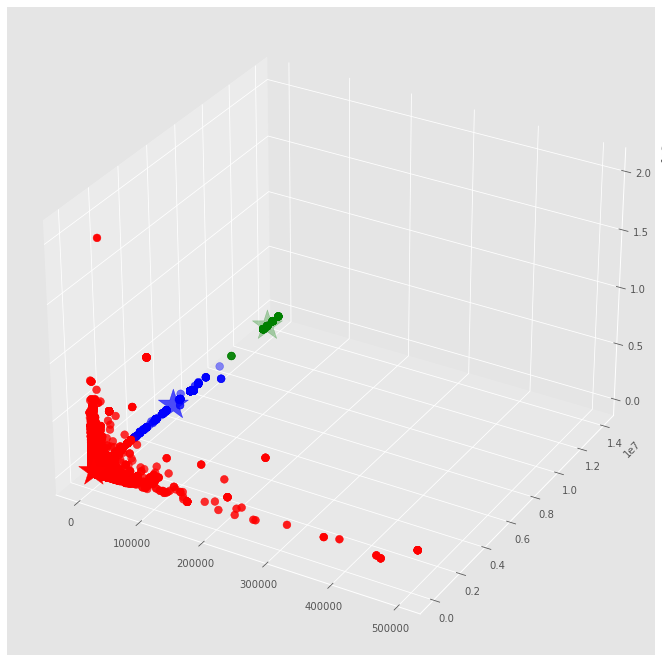

In [11]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Figura 4. En esta gráfica se pueden observar 3 cluster el cual se refiere a una separación más. Cómo en la gráfica anterior los datos rojos son no verificados y al igual que son los usuarios que no tienen una gran cantidad de followers. Los datos azules son cuentas verificadas y que presentan una cantidad moderada de seguidores y ya los puntos verdes, son comunidades muy grandes y con bastante influencia en las redes sociales.

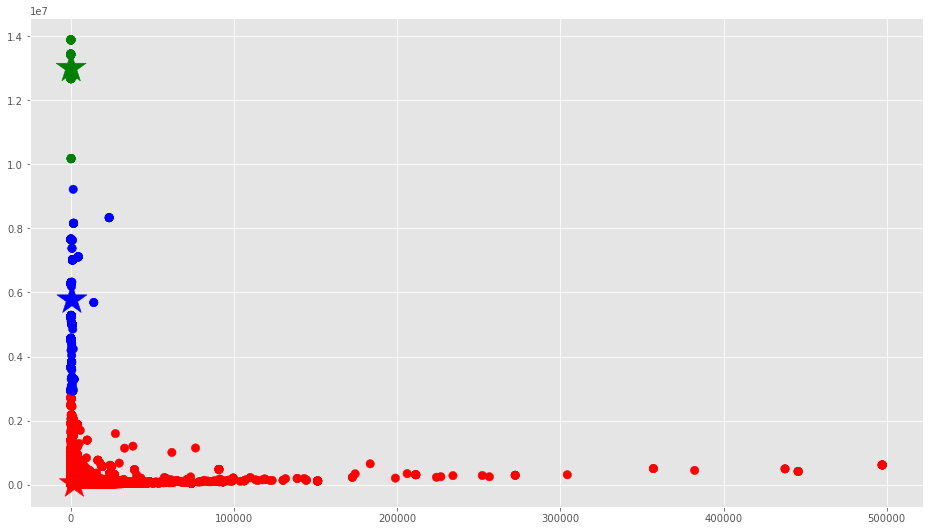

In [12]:
# Getting the values and plotting it
f1 = dataframe['user_friends'].values
f2 = dataframe['user_followers'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

Figura 5. Esta gráfica representa la relación que hay entre los followers y los friends y como podemos ver también por gráficas anteriores, estas tienen una tendencia similar, por lo que quiere decir que entre más followers tenga el usuario, más amigos va a tener.

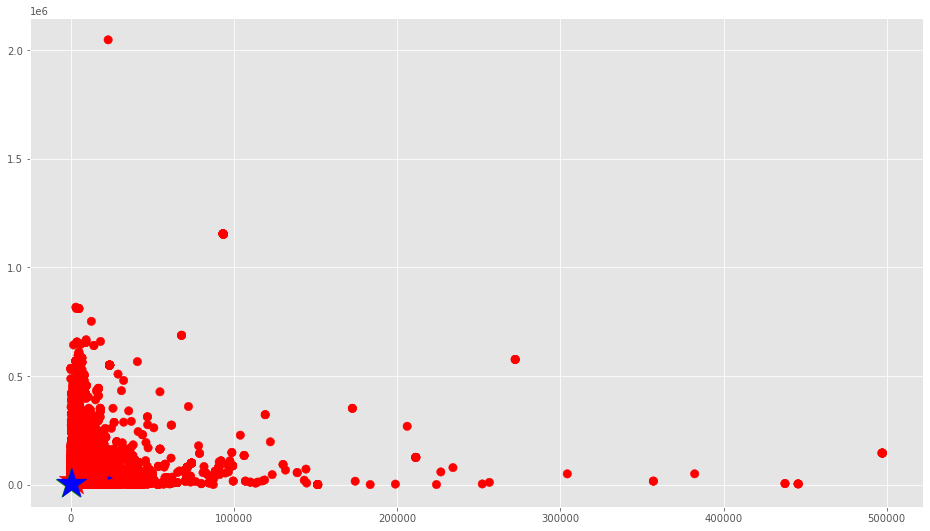

In [13]:
# Getting the values and plotting it
f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Figura 6. Esta grafica representa la relación existente entre los amigos y seguidores de los usuarios. Podemos observar que aquellos grupos con mayor numero de followers no tienen tantos amigos y favoritos, como aquellos que carecen de seguidores, sin embargo este grupo que prevalece dentro de la gráfica tiene una gran dispersión de datos.

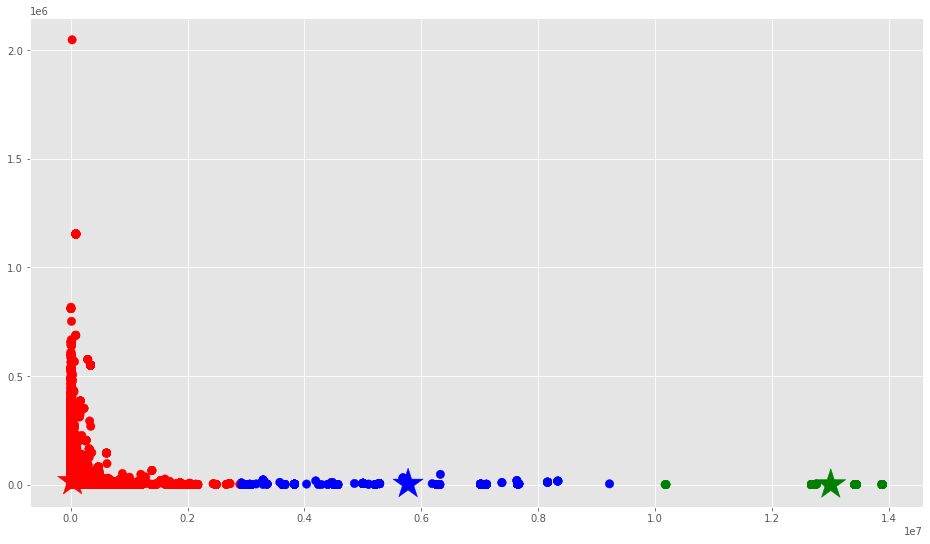

In [14]:
f1 = dataframe['user_followers'].values
f2 = dataframe['user_favourites'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Figura 7.  Esta gráfica representa la relación entre los followers y los favoritos donde aquí la tendencia es de que se agrupa más y esto es porque entre comunidades grandes también hay favoritos con igual cantidad de seguidores o con más o incluso menos. Aquí podemos inferir que los seguidores de alguien grande pueden ser seguidores de una página o comunidad que tenga relación con el mismo tema que están tratando.

In [15]:
copy =  pd.DataFrame()
copy['user_name']=dataframe['user_name'].values
copy['boolVerified']=dataframe['boolVerified'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,73670
1,green,161
2,blue,605


Obtenemos la ubicación dentro de los arrays, de los representantes mas cercanos a los centros

In [16]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([14321, 70675, 13688], dtype=int64)

Obtenemos el nombre de usuario de los representantes mas cercanos a los centros de acuerdo a su ubicación dentro de los arrays.

In [17]:
users=dataframe['user_name'].values
for row in closest:
    print(users[row])

🎗Christine Assange
The Times Of India
El Universal


In [18]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['boolVerified']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('boolVerified').size()
diversidadGrupo

,boolVerified,cantidad
0,0,65079
1,1,8591


# Preguntas

## ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
Si son representativos los datos debido a que se agrupan en 3 clusters y nos da información sobre los seguidores, amigos y los favoritos de los usuarios que se presentan en la base de datos. Gracias a esta representación, se pueden sacar varias conclusiones para así ofrecer datos confiables al público.

## ¿Cómo obtuviste el valor de K a usar?
Obtuvimos el valor de K utilizando un código en Python. Para determinar el número de clusters primero realizamos una gráfica (Elbow chart) para encontrar el “codo”. Como la gráfica empieza a cambiar su tendencia entre el número tres y el cuatro, decidimos tomar el 3, es decir que tomamos en cuenta 3 clusters.

## ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
Sí, los centros serían más representativos, ya que este centro dependería de menos valores, mientras más bajo sea el valor de k, menos centros hay, y dependiendo de la cantidad de datos menos representativo es. Es por ello que primero se obtiene el valor de K, para que la cantidad de centros sean los adecuados, y sean los más representativos.

## ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?
No hay una distancia establecida entre los centros, y esta va a depender de la densidad de los datos, más aún al ser problemas bivariables, y  la forma de visualización es en 3 planos. Sin embargo, si hay centros más cercanos que otros.
La distancia que tienen los centros entre sí están relacionados con los cluster, el primer centro tiene datos muy agrupados, la distancia del primer centro al segundo centro es de aproximadamente a los 10,000 followers y ya del segundo centro al tercer centro tiene una distancia de cerca 70,000. La distancia entre el primer centro y el tercero es cerca de 80,000.

## ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
El primer cambio considerable es que tendríamos más centros, en caso de que el número de centros no se modifique, el cambio que habría es que estos centros aumenten su distancia entre sí para poder abarcar todos los valores, sin embargo no sería conveniente, por que dejarían ser representativos de los valores y no estaríamos generando información suficiente que nos algo de información.

## ¿Qué puedes decir de los datos basándose en los centros?
Los datos que se basan en los centros destaca más que nada la personas que no están verificadas y que además no poseen amigos o followers de manera alta, si no que en ese caso, son personas que no crean algún contenido fuerte y que tienen un grupo de amigos y followers bastante bajos. También podemos decir que los que están más alejados del centro son personas o comunidades que tienen más influencia y que a su vez, tienen más follower y friends.
